# The Battle Of Neighborhood

## Methodology



### 1. FIrstly we collect the New York City Data from https://cocl.us/new_york_dataset

In [2]:
# Import all the requried libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.1.1g             |       h516909a_0         2.1 MB  conda-forge
    certifi-2020.4.5.2         |   py36h9f0ad1d_0         152 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    ca-certificates-2020.4.5.2 |       hecda079_0         147 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [46]:
!wget -q -O 'newyork_data.json' https://cocl.us/new_york_dataset
print('Data downloaded!')
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

Data downloaded!


In [47]:
neighborhoods_data = newyork_data['features']

# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [48]:
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [50]:
neighborhoods.shape

(306, 4)

In [7]:
# Get the office location

address = '1540 Broadway, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New Office are {}, {}.'.format(latitude, longitude))


#Create DF for new office
# define the dataframe columns
column_names2 = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 
newoffice = pd.DataFrame(columns=column_names2)
newoffice = neighborhoods.append({'Borough': "Manhattan",
                                          'Neighborhood': "Midtown",
                                          'Latitude': 40.75803195,
                                          'Longitude': -73.98483197526832}, ignore_index=True)

The geograpical coordinate of New Office are 40.75803195, -73.98483197526832.


In [8]:
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)
map_office = folium.Map(location=[40.75803195, -73.98483197526832], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(newoffice['Latitude'], newoffice['Longitude'], newoffice['Borough'], newoffice['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [40.75803195, -73.98483197526832],
        radius=5,
        popup=label,
        color='Red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_office)  

#map_newyork
map_office

### We can see in the map, the new office is located in the middle of Mahattan, midtown Neighborhood

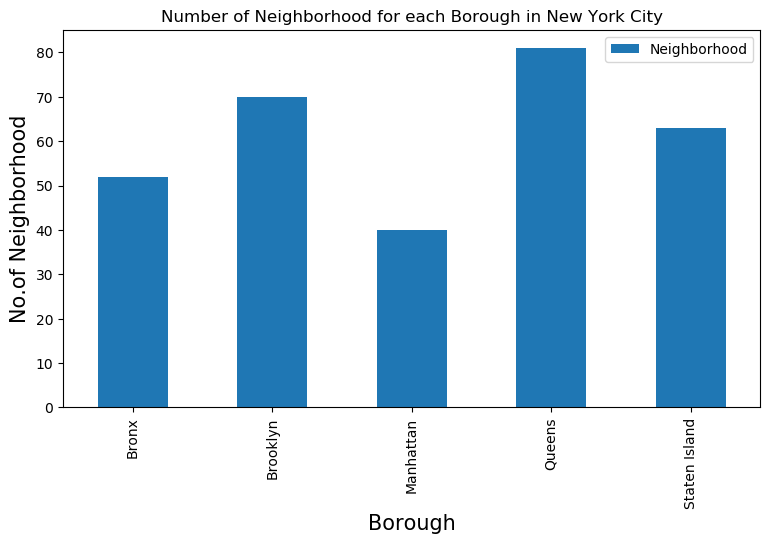

In [10]:
# Quickly look at no. of neighborhood in each Borough
import matplotlib.pyplot as plt
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### 2. Then we will look at safety data to indicate the safety of each Borough

In [11]:
#Download crime data
import pandas as pd
import io
import requests
url="https://data.cityofnewyork.us/api/views/833y-fsy8/rows.csv?accessType=DOWNLOAD"
s=requests.get(url).content
crimedf = pd.read_csv(io.StringIO(s.decode('utf-8')))
    
crimedf.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,PRECINCT,JURISDICTION_CODE,LOCATION_DESC,STATISTICAL_MURDER_FLAG,PERP_AGE_GROUP,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude
0,169180023,09/09/2017,3:57:00,STATEN ISLAND,120,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK,959975,171772,40.638126,-74.087467
1,169180027,09/09/2017,22:15:00,BRONX,50,0.0,NaN,False,NaN,NaN,NaN,25-44,M,BLACK HISPANIC,1011288,255912,40.869061,-73.902242
2,169180025,09/09/2017,18:35:00,BROOKLYN,79,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,18-24,M,BLACK,999888,193014,40.696450,-73.943607
3,169180024,09/09/2017,15:20:00,BROOKLYN,67,0.0,NaN,False,18-24,M,BLACK,18-24,M,BLACK,997784,172132,40.639137,-73.951236
4,169180022,09/09/2017,0:20:00,BROOKLYN,61,2.0,MULTI DWELL - PUBLIC HOUS,False,NaN,NaN,NaN,25-44,M,ASIAN / PACIFIC ISLANDER,1001019,156467,40.596134,-73.939619


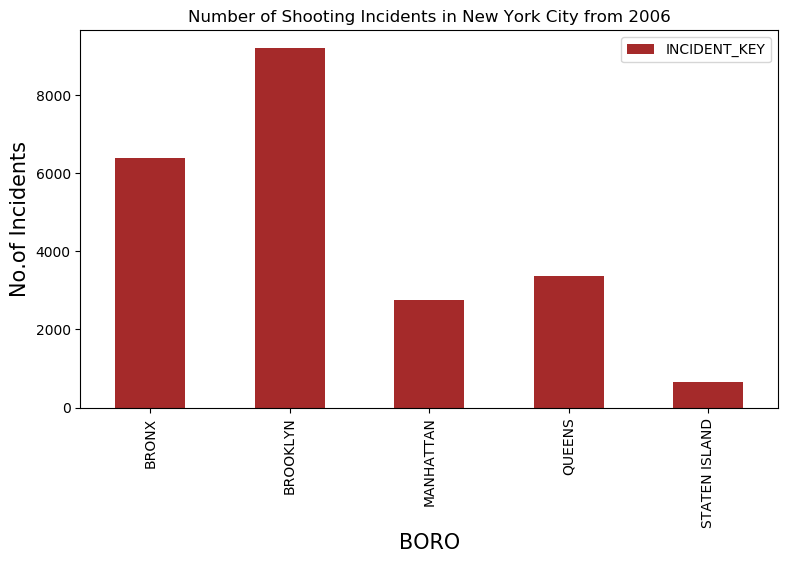

In [72]:
#plt the data
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Shooting Incidents in New York City from 2006')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Incidents', fontsize=15)
#giving a bar plot
crimedf.groupby('BORO')['INCIDENT_KEY'].count().plot(kind='bar',color='Brown')
#legend
plt.legend()
#displays the plot
plt.show()

### Look like Manhattan and Staten Island are the two safer borough to live in

### 3. Start exploring Japanese Restaurant and Gym by using Foursquare API

In [13]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [53]:
CLIENT_ID = 'THEK4RSU4SUS5VV5NS3BNPBLB0BXM0CAJ3XQ3RTNFQM5G52F' # your Foursquare ID
CLIENT_SECRET = '5KGX3D5F5QPDPNJVLUZ3GLP1U1U55BHXNQW552WKYVXDB4KS' # your Foursquare Secret
VERSION = '20180608' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: THEK4RSU4SUS5VV5NS3BNPBLB0BXM0CAJ3XQ3RTNFQM5G52F
CLIENT_SECRET:5KGX3D5F5QPDPNJVLUZ3GLP1U1U55BHXNQW552WKYVXDB4KS


In [59]:
LIMIT = 100
radius = 1000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat, 
    lng, 
    radius, 
    LIMIT)

url

'https://api.foursquare.com/v2/venues/explore?&client_id=THEK4RSU4SUS5VV5NS3BNPBLB0BXM0CAJ3XQ3RTNFQM5G52F&client_secret=5KGX3D5F5QPDPNJVLUZ3GLP1U1U55BHXNQW552WKYVXDB4KS&v=20180608&ll=40.75803195,-73.98483197526832&radius=1000&limit=100'

In [64]:
#for row in neighborhoods.values.tolist():
column_names=['Borough', 'Neighborhood', 'ID','Name']
japrest=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
#    venues = get_venues(Latitude,Longitude)
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            Latitude, 
            Longitude, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    
    try:
        venue_data=results["response"]['groups'][0]['items']
    except KeyError:
        pass
    
    
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    
    column_names=['ID','Name','Category']
    venues = pd.DataFrame(venue_details,columns=column_names)    
    
    
    jap_rest=venues[venues['Category']=='Japanese Restaurant']   
    print('(',count,'/',len(neighborhoods),')','Japanese restaurant in '+Neighborhood+', '+Borough+':'+str(len(jap_rest)))
    for resturant_detail in jap_rest.values.tolist():
        id, name , category = resturant_detail
        japrest = japrest.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1


( 1 / 306 ) Japanese restaurant in Wakefield, Bronx:0
( 2 / 306 ) Japanese restaurant in Co-op City, Bronx:0
( 3 / 306 ) Japanese restaurant in Eastchester, Bronx:0
( 4 / 306 ) Japanese restaurant in Fieldston, Bronx:0
( 5 / 306 ) Japanese restaurant in Riverdale, Bronx:2
( 6 / 306 ) Japanese restaurant in Kingsbridge, Bronx:2
( 7 / 306 ) Japanese restaurant in Marble Hill, Manhattan:0
( 8 / 306 ) Japanese restaurant in Woodlawn, Bronx:0
( 9 / 306 ) Japanese restaurant in Norwood, Bronx:0
( 10 / 306 ) Japanese restaurant in Williamsbridge, Bronx:0
( 11 / 306 ) Japanese restaurant in Baychester, Bronx:0
( 12 / 306 ) Japanese restaurant in Pelham Parkway, Bronx:0
( 13 / 306 ) Japanese restaurant in City Island, Bronx:1
( 14 / 306 ) Japanese restaurant in Bedford Park, Bronx:0
( 15 / 306 ) Japanese restaurant in University Heights, Bronx:0
( 16 / 306 ) Japanese restaurant in Morris Heights, Bronx:0
( 17 / 306 ) Japanese restaurant in Fordham, Bronx:0
( 18 / 306 ) Japanese restaurant in Ea

In [78]:
japrest.shape
japrest.head()

,Borough,Neighborhood,ID,Name
0,Bronx,Riverdale,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant
1,Bronx,Riverdale,4b0b311af964a520642e23e3,Palace of Japan
2,Bronx,Kingsbridge,503cfaffe4b066d39de5005a,Aoyu Japanese Restaurant
3,Bronx,Kingsbridge,4b0b311af964a520642e23e3,Palace of Japan
4,Bronx,City Island,4dbdf3d790a02849cbd675be,Ohana Japanese Habachi Seafood & Steakhouse


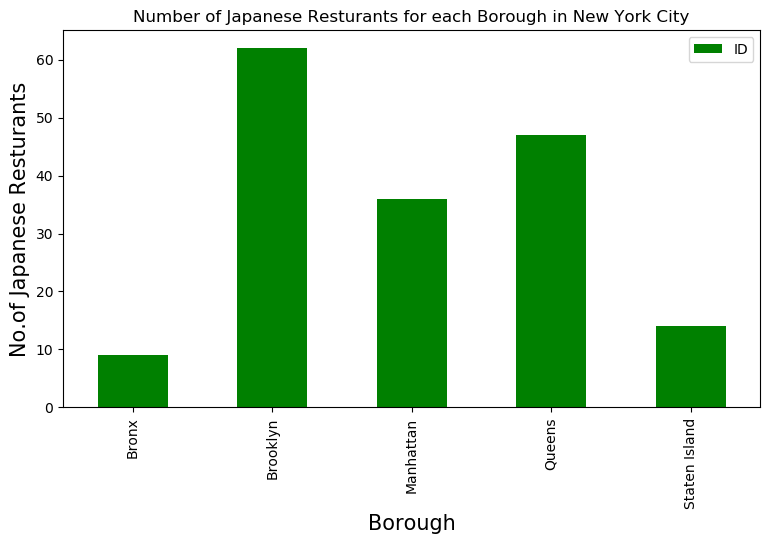

In [70]:
#plt the japanese restaurants by Borough
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Japanese Resturants for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Japanese Resturants', fontsize=15)
#giving a bar plot
japrest.groupby('Borough')['ID'].count().plot(kind='bar',color='Green')
#legend
plt.legend()
#displays the plot
plt.show()

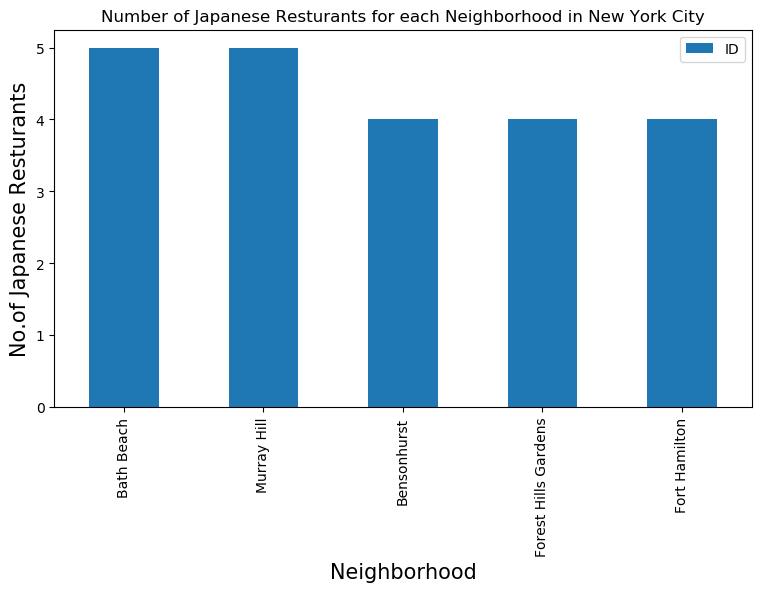

In [76]:
#plt the japanese restaurants by Neighborhood
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Japanese Resturants for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Japanese Resturants', fontsize=15)
#giving a bar plot
japrest.groupby('Neighborhood')['ID'].count().nlargest(5).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

### Let's look at the rating of the above 2 top neighborhood with Japanese restaurant

In [90]:
def get_venue_details(venue_id):
    
    #url to fetch data from foursquare api
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    
    # get all the data
    results = requests.get(url).json()
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
        
    column_names=['ID','Name','Likes','Rating','Tips']
    df = pd.DataFrame(venue_details,columns=column_names)
    return df

In [88]:
MHjaprest= japrest[japrest['Neighborhood']=='Murray Hill']
BBjaprest= japrest[japrest['Neighborhood']=='Bath Beach']
frames = [MHjaprest, BBjaprest]
Filterjaprest = pd.concat(frames)

In [91]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
Filterjaprestrate=pd.DataFrame(columns=column_names)
count=1


for row in Filterjaprest.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(Filterjaprest),')','processed')
    Filterjaprestrate = Filterjaprestrate.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID           Name  Likes  Rating  Tips
0  540dc46d498e86f0e5059dd2  Zuma New York    454     8.4    84
( 1 / 10 ) processed
                         ID            Name  Likes  Rating  Tips
0  591caee89deb7d0f69be77a2  Omusubi Gonbei     14     8.3     1
( 2 / 10 ) processed
                         ID               Name  Likes  Rating  Tips
0  49db8b67f964a520d85e1fe3  Aburiya Kinnosuke    279     8.8    91
( 3 / 10 ) processed
                         ID            Name  Likes  Rating  Tips
0  4bc8eee83740b713fcbe5d65  Northern Sushi      6     7.9     2
( 4 / 10 ) processed
                         ID         Name  Likes  Rating  Tips
0  5cf07afa66f3cd002c8b3ae6  Izakaya Mew      7     7.3     1
( 5 / 10 ) processed
                         ID                           Name  Likes  Rating  \
0  51f42bb3498e2681264e00a1  Kasumi Sushi & BBQ Restaurant      6     7.4   

   Tips  
0     3  
( 6 / 10 ) processed
                         ID        Name  Likes  Rat

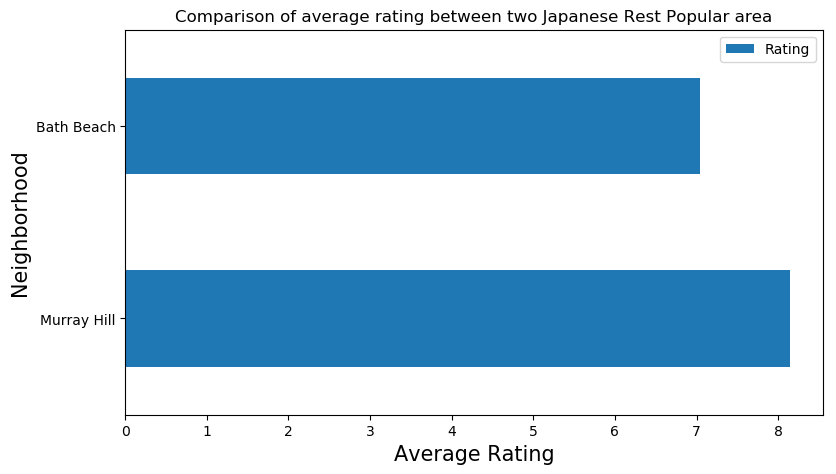

In [105]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Comparison of average rating between two Japanese Rest Popular area')
#On x-axis
plt.xlabel('Average Rating', fontsize = 15)
#On y-axis
plt.ylabel('Neighborhood', fontsize=15)
#giving a bar plot
Filterjaprestrate.groupby('Neighborhood')['Rating'].mean().nlargest(5).plot(kind='barh')
#legend
plt.legend()
#displays the plot
plt.show()

### In terms of Rating we can see Murray Hill's Japanese Restaurants have better Rating than Bath Beach

### Let's do a similar analysis for GYM

In [107]:
#for row in neighborhoods.values.tolist():
column_names=['Borough', 'Neighborhood', 'ID','Name']
gym=pd.DataFrame(columns=column_names)
count=1
for row in neighborhoods.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=row
#    venues = get_venues(Latitude,Longitude)
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            Latitude, 
            Longitude, 
            radius, 
            LIMIT)
    
    # get all the data
    results = requests.get(url).json()
    
    try:
        venue_data=results["response"]['groups'][0]['items']
    except KeyError:
        pass
    
    
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    
    column_names=['ID','Name','Category']
    venues = pd.DataFrame(venue_details,columns=column_names)    
    
    
    gymdata=venues[venues['Category']=='Gym']   
    print('(',count,'/',len(neighborhoods),')','Gym or Fitness Centre in '+Neighborhood+', '+Borough+':'+str(len(gymdata)))
    for resturant_detail in gymdata.values.tolist():
        id, name , category = resturant_detail
        gym = gym.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

( 1 / 306 ) Gym or Fitness Centre in Wakefield, Bronx:0
( 2 / 306 ) Gym or Fitness Centre in Co-op City, Bronx:0
( 3 / 306 ) Gym or Fitness Centre in Eastchester, Bronx:1
( 4 / 306 ) Gym or Fitness Centre in Fieldston, Bronx:0
( 5 / 306 ) Gym or Fitness Centre in Riverdale, Bronx:0
( 6 / 306 ) Gym or Fitness Centre in Kingsbridge, Bronx:2
( 7 / 306 ) Gym or Fitness Centre in Marble Hill, Manhattan:2
( 8 / 306 ) Gym or Fitness Centre in Woodlawn, Bronx:0
( 9 / 306 ) Gym or Fitness Centre in Norwood, Bronx:3
( 10 / 306 ) Gym or Fitness Centre in Williamsbridge, Bronx:1
( 11 / 306 ) Gym or Fitness Centre in Baychester, Bronx:0
( 12 / 306 ) Gym or Fitness Centre in Pelham Parkway, Bronx:0
( 13 / 306 ) Gym or Fitness Centre in City Island, Bronx:0
( 14 / 306 ) Gym or Fitness Centre in Bedford Park, Bronx:2
( 15 / 306 ) Gym or Fitness Centre in University Heights, Bronx:0
( 16 / 306 ) Gym or Fitness Centre in Morris Heights, Bronx:1
( 17 / 306 ) Gym or Fitness Centre in Fordham, Bronx:2
( 18

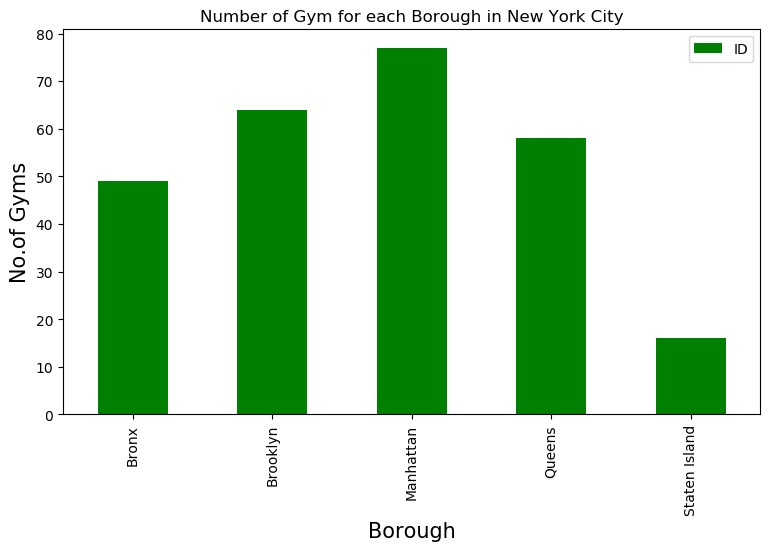

In [108]:
#plt the Gym by Borough
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Gym for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Gyms', fontsize=15)
#giving a bar plot
gym.groupby('Borough')['ID'].count().plot(kind='bar',color='Green')
#legend
plt.legend()
#displays the plot
plt.show()

In [109]:
gym.shape

(264, 4)

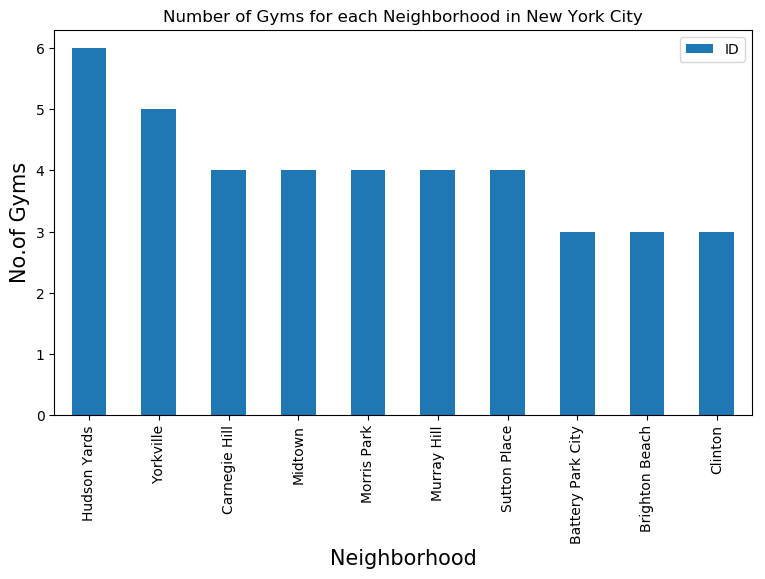

In [113]:
#plt the japanese restaurants by Neighborhood
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Gyms for each Neighborhood in New York City')
#On x-axis
plt.xlabel('Neighborhood', fontsize = 15)
#On y-axis
plt.ylabel('No.of Gyms', fontsize=15)
#giving a bar plot
gym.groupby('Neighborhood')['ID'].count().nlargest(10).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [111]:
gym.head(300)

,Borough,Neighborhood,ID,Name
0,Bronx,Eastchester,515a06a6e4b02cb805463f85,Kinetic Sports Club
1,Bronx,Kingsbridge,55f751ca498eacc0307d1cfe,Blink Fitness
2,Bronx,Kingsbridge,4cf6ae55d3a8a1cd71a9d243,Astral Fitness & Wellness Center
3,Manhattan,Marble Hill,55f751ca498eacc0307d1cfe,Blink Fitness
4,Manhattan,Marble Hill,4cf6ae55d3a8a1cd71a9d243,Astral Fitness & Wellness Center
5,Bronx,Norwood,4b7f095bf964a520f51130e3,Soma Health Club
6,Bronx,Norwood,5cf7f63cb9b37b002c7b4d0f,Blink Fitness
7,Bronx,Norwood,4ee9027d9adfd1b4c3d82c87,The Wolverine Cage
8,Bronx,Williamsbridge,5ac7c4af67f62b7f2934cdeb,Blink Fitness
9,Bronx,Bedford Park,5cf7f63cb9b37b002c7b4d0f,Blink Fitness


### Check Rating of all Gyms

In [114]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
gymrate=pd.DataFrame(columns=column_names)
count=1


for row in gym.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_details(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        # we will assign 0 value for these resturants as they may have been 
        #recently opened or details does not exist in FourSquare Database
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(gym),')','processed')
    gymrate = gymrate.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1

                         ID                 Name  Likes  Rating  Tips
0  515a06a6e4b02cb805463f85  Kinetic Sports Club     32     8.7     5
( 1 / 264 ) processed
                         ID           Name  Likes  Rating  Tips
0  55f751ca498eacc0307d1cfe  Blink Fitness     32     7.6     3
( 2 / 264 ) processed
                         ID                              Name  Likes  Rating  \
0  4cf6ae55d3a8a1cd71a9d243  Astral Fitness & Wellness Center      6     7.3   

   Tips  
0     1  
( 3 / 264 ) processed
                         ID           Name  Likes  Rating  Tips
0  55f751ca498eacc0307d1cfe  Blink Fitness     32     7.6     3
( 4 / 264 ) processed
                         ID                              Name  Likes  Rating  \
0  4cf6ae55d3a8a1cd71a9d243  Astral Fitness & Wellness Center      6     7.3   

   Tips  
0     1  
( 5 / 264 ) processed
                         ID              Name  Likes  Rating  Tips
0  4b7f095bf964a520f51130e3  Soma Health Club     14     7.1     

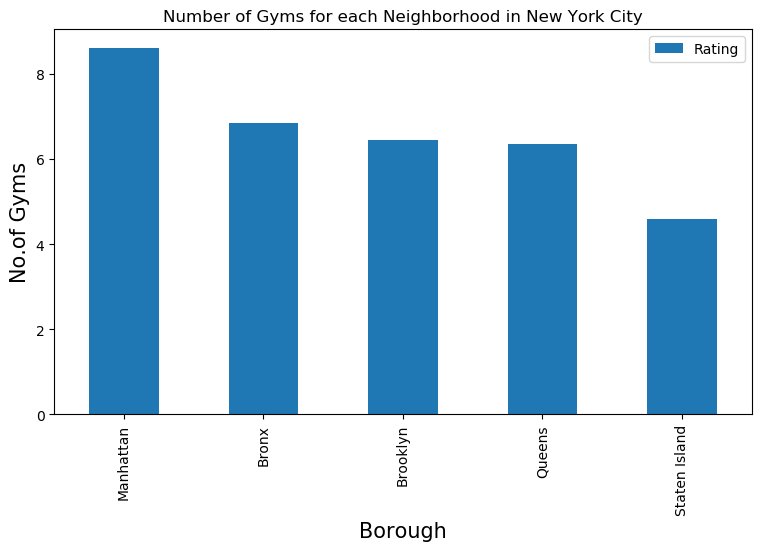

In [117]:
#plt the japanese restaurants by Neighborhood
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Rating of Gym by Borough level')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Gyms', fontsize=15)
#giving a bar plot
gymrate.groupby('Borough')['Rating'].mean().nlargest(20).plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

In [122]:
Avegymrate=gymrate.groupby('Borough')['Rating'].mean()
Avegymrate

Borough
Bronx            6.844898
Brooklyn         6.456250
Manhattan        8.615584
Queens           6.348276
Staten Island    4.593750
Name: Rating, dtype: float64

In [120]:
MHgymrate= gymrate[gymrate['Neighborhood']=='Murray Hill']
MHgymrate.head(20)

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
116,Manhattan,Murray Hill,49c943d2f964a5204f581fe3,Equinox Park Avenue,364,8.5,60
117,Manhattan,Murray Hill,42af6f80f964a5205a251fe3,Equinox East 44th Street,259,9.1,38
118,Manhattan,Murray Hill,4c780d08566db60c5a4f400e,Manhattan Place Health Club,8,8.5,0
119,Manhattan,Murray Hill,4a047a18f964a520ff711fe3,Equinox East 43rd Street,120,8.6,18
